In [4]:
pip install ipywidgets scipy nibabel

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
from __future__ import print_function
import importlib
from distutils.version import LooseVersion

# check that all packages are installed (see requirements.txt file)
required_packages = {'jupyter', 
                     'numpy',
                     'matplotlib',
                     'ipywidgets',
                     'scipy',
                     'pandas',
                     'SimpleITK'
                    }

problem_packages = list()
# Iterate over the required packages: If the package is not installed
# ignore the exception. 
for package in required_packages:
    try:
        p = importlib.import_module(package)        
    except ImportError:
        problem_packages.append(package)
    
if len(problem_packages) == 0:
    print('All is well.')
else:
    print('The following packages are required but not installed: ' \
          + ', '.join(problem_packages))

All is well.


In [35]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

The scan data array has the shape:  (44, 43, 4)
The required aspect ratios are:  [0.32812482, 0.32812482, 1.0]


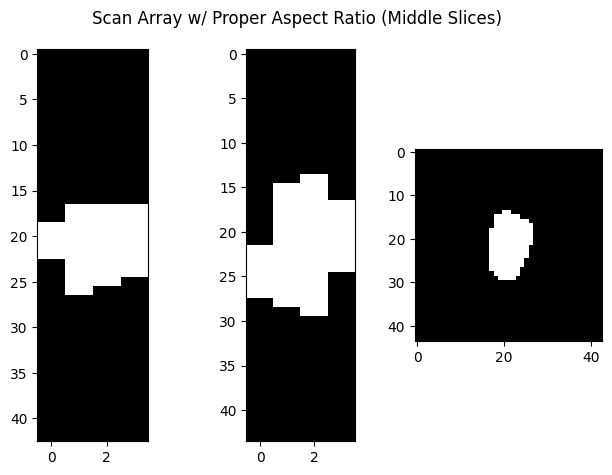

In [34]:
#Define the filepath to your NIfTI scan
# scanFilePath = 'SampleDataset/CT/image/LIDC-IDRI-0001.nii.gz'
# scanFilePath = 'FullDataset/VOIs/image/LIDC-IDRI-0003_R_3.nii.gz'
scanFilePath = 'FullDataset/VOIs/nodule_mask/LIDC-IDRI-0003_R_3.nii.gz'
 
#Load the scan and extract data using nibabel 
scan = nib.load(scanFilePath)
scanArray = scan.get_fdata()
#Get and print the scan's shape 
scanArrayShape = scanArray.shape
print('The scan data array has the shape: ', scanArrayShape)

#Examine scan's shape and header 
scanHeader = scan.header
# print('The scan header is as follows: \n', scanHeader)

# #Display scan array's middle slices
# fig, axs = plt.subplots(1,3)
# fig.suptitle('Scan Array (Middle Slices)')
# axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], cmap='gray')
# axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], cmap='gray')
# axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], cmap='gray')
# fig.tight_layout()
# plt.show()

#Calculate proper aspect ratios
pixDim = scanHeader['pixdim'][1:4]
aspectRatios = [pixDim[1]/pixDim[2],pixDim[0]/pixDim[2],pixDim[0]/pixDim[1]]
print('The required aspect ratios are: ', aspectRatios)

#Display scan array's middle slices with proper aspect ratio
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array w/ Proper Aspect Ratio (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], aspect = aspectRatios[0], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], aspect = aspectRatios[1], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], aspect = aspectRatios[2], cmap='gray')
fig.tight_layout()
plt.show()